In [1]:
# The code was removed by Watson Studio for sharing.

## Introduction: About the dataset and methodology

This dataset is about the boroughs in Munich, most common venues of boroughs and apartment data from the biggest apartment platform in Germany with several features such as price and living space.

**Chapter I:**  
This chapter is about clustering the boroughs in Munich regarding venue category.  
First, I will scrape the borough names from the Wikipedia page of the boroughs of Munich: https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens  
Afterwards, I will convert the boroughs into their equivalent latitude and longitude values via the Google Geocode API.  
I will use the Foursquare API to explore the most common venue categories in each borough in Munich.  
This feature will be used to group the boroughs into clusters of similar venue categories.   
The k-means clustering algorithm, which evaluates similarity in regards to a feature distance matrix, will be used to complete this task.  
The Folium library in Python will be used to visualize the boroughs in Munich and their emerging clusters.  
As a personal preference, I will select boroughs that offer good **supermarket availability** as their most common venue category and **access to public transport** as their second most common category.

**Chapter II:**  
Once the most suitable borough or boroughs have been found, I will scrape apartment listings from the immobilienscout24 platform and try to find the "best" apartment in my selected boroughs.   
The "best" apartment is an apartment that offers best value for its characteristics given, such as number of rooms, available living space and borough.  
In order to find the best apartment, I will use a regression model, namely the RANSAC method, to determine outliers and fit a regression line through all relevant data points.  
Regression metrics, such as R_squared, will be calculated and displayed in a seaborn plot.  

As my choice of presentation, I will use my website and host the Folium frame in order to display all apartments.  
The link to my website is as follows:  https://www.etherx.de

# Chapter I
## Data pre-processing and exploratory data analysis
### Scraping the borough data and loading it into a Pandas dataframe

First, I will scrape the borough data from Wikipedia using Python and the BeautifulSoup library.  
If we take a look at the HTML code of the Wikipedia page, all the required data is stored in a **td** (table data) element of the first table.  
Therefore, the strategy is to locate this wikipedia table, then find the **td** element and then iterate through all the anchor elements that contain the borough names.  
This data will be loaded into the Pandas dataframe neighborhoods:


In [2]:
import pandas as pd

# define the dataframe columns
column_names = ['Borough', 'Neighborhood'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# load libraries for scraping data
from bs4 import BeautifulSoup
import urllib.request
def make_soup(url):
    wikipage = urllib.request.urlopen(url)
    soupdata = BeautifulSoup(wikipage, "html.parser")
    return soupdata

soup = make_soup("https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens")

# find the table
table = soup.find_all('table', class_="wikitable sortable")[1]  # Only use the second table

# iterate over it
wikidatasaved = []
for item in table.findAll('tr'):
    wikidata = []
    for data in item.findAll('td'):
        wikidata.append(data.text)
    if len(wikidata) == 3:
        neighborhoods = neighborhoods.append({'Borough': wikidata[1],
                                          'Neighborhood': wikidata[2]}, ignore_index=True)

# remove newline from Neighborhood column
neighborhoods['Neighborhood'] = neighborhoods['Neighborhood'].map(lambda x: str(x)[:-1])
neighborhoods['Neighborhood'].replace({'\([^)]*\)': ''}, regex=True,inplace=True)
neighborhoods

Borough  \
0                                      Altstadt-Lehel   
1                        Ludwigsvorstadt-Isarvorstadt   
2                                         Maxvorstadt   
3                                      Schwabing-West   
4                                       Au-Haidhausen   
5                                            Sendling   
6                                   Sendling-Westpark   
7                                    Schwanthalerhöhe   
8                               Neuhausen-Nymphenburg   
9                                             Moosach   
10                              Milbertshofen-Am Hart   
11                                 Schwabing-Freimann   
12                                        Bogenhausen   
13                                       Berg am Laim   
14                                     Trudering-Riem   
15                                 Ramersdorf-Perlach   
16                            Obergiesing-Fasangarten   
17                            Untergiesing-Harlaching   
18  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
19                                             Hadern   
20                                 Pasing-Obermenzing   
21                         Aubing-Lochhausen-Langwied   
22                                Allach-Untermenzing   
23                             Feldmoching-Hasenbergl   
24                                               Laim   

                                         Neighborhood  
0   Graggenau , Angerviertel , Hackenviertel , Kre...  
1   Gärtnerplatz , Deutsches Museum , Glockenbach ...  
2   Königsplatz , Augustenstraße , St. Benno , Mar...  
3   Neuschwabing , Am Luitpoldpark , Schwere-Reite...  
4   Maximilianeum , Steinhausen , Haidhausen-Nord ...  
5                    Untersendling , Sendlinger Feld   
6   Mittersendling , Land in Sonne , Am Waldfriedhof   
7                         Westend , Schwanthalerhöhe   
8   Neuhausen , Nymphenburg , Oberwiesenfeld , St....  
9                      Alt Moosach , Moosach-Bahnhof   
10           Am Hart , Am Riesenfeld , Milbertshofen   
11  Freimann , Obere Isarau , Alte Heide-Hirschau ...  
12  Oberföhring , Johanneskirchen , Herzogpark , E...  
13        Echarding , Josephsburg , Berg am Laim Ost   
14  Trudering-Riem , Messestadt Riem , Gartenstadt...  
15  Ramersdorf , Balanstraße-West , Altperlach , N...  
16                          Obergiesing , Südgiesing   
17  Untergiesing , Siebenbrunn , Giesing , Neuharl...  
18  Thalkirchen , Obersendling , Forstenried , Für...  
19                 Blumenau , Neuhadern , Großhadern   
20     Neupasing , Am Westbad , Pasing , Obermenzing   
21     Altaubing , Aubing-Süd , Lochhausen , Freiham   
22             Industriebezirk , Untermenzing-Allach   
23  Feldmoching , Hasenbergl-Lerchenau Ost , Ludwi...  
24                          Friedenheim , St. Ulrich

In [3]:
# The code was removed by Watson Studio for sharing.

Borough  \
0                Altstadt-Lehel   
1  Ludwigsvorstadt-Isarvorstadt   
2                   Maxvorstadt   
3                Schwabing-West   
4                 Au-Haidhausen   

                                        Neighborhood   Latitude  Longitude  
0  Graggenau , Angerviertel , Hackenviertel , Kre...  48.143054  11.588587  
1  Gärtnerplatz , Deutsches Museum , Glockenbach ...  48.126250  11.558295  
2  Königsplatz , Augustenstraße , St. Benno , Mar...  48.149976  11.573622  
3  Neuschwabing , Am Luitpoldpark , Schwere-Reite...  48.167852  11.571096  
4  Maximilianeum , Steinhausen , Haidhausen-Nord ...  48.128592  11.593926

In [4]:
print('The dataframe has {} boroughs and {} location data.'.format(
        len(neighborhoods['Borough'].unique()), len(neighborhoods['Latitude'].unique())
    )
)

The dataframe has 25 boroughs and 25 location data.


### Using the Foursquare API to explore and segment boroughs

Next, we are going to start utilizing the Foursquare API to explore the Boroughs and segment them.  
Let's start off with defining the Foursquare credentials and the version:


In [5]:
# The code was removed by Watson Studio for sharing.

Let's take a look at the first Borough in our Munich dataframe and get its coordinates:

In [6]:
neighborhoods.loc[0, 'Borough']


'Altstadt-Lehel'

In [7]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Altstadt-Lehel are 48.1430545, 11.5885872.


Now, let's use the Foursquare API to get the top 100 venues that are within a radius of 1000 meters from the Boroughs center coordinates:

In [8]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results # display results

{'meta': {'code': 200, 'requestId': '5bf452e59fb6b7578fc6bcab'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4c1369ec7f7f2d7f9b01df68-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/surfspot_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1e3941735',
         'name': 'Surf Spot',
         'pluralName': 'Surf Spots',
         'primary': True,
         'shortName': 'Surf Spot'}],
       'id': '4c1369ec7f7f2d7f9b01df68',
       'location': {'address': 'Prinzregentenstr. 1',
        'cc': 'DE',
        'city': 'München',
        'country': 'Deutschland',
        'crossStreet': 'Lerchenfeldstr.',
        'distance': 68,
        'formattedAddress': ['Prinzregentenstr. 1 (Lerchenfeldstr.)',
         '80538 München',
         'Deutschland'],
   

Apparently, there are 143 venues in a radius of 1000 meters.  
Let's see what kind of venues have been found by casting the JSON to a Pandas dataframe:

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



In [10]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON data into a Pandas dataframe

# filter columns 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name             categories        lat        lng
0        Eisbachwelle              Surf Spot  48.143342  11.587775
1    Fräulein Grüneis            Snack Place  48.143715  11.589003
2     Die Goldene Bar           Cocktail Bar  48.144107  11.586004
3   Restaurant Tempel  Vietnamese Restaurant  48.142037  11.586505
4  Liebighof im Lehel      German Restaurant  48.140738  11.590670

### Exploring all boroughs in Munich

After exploring one single Borough, let's create a function to do the same process to all boroughs in Munich:


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
munich_venues = getNearbyVenues(names=neighborhoods['Borough'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Schwabing-West
Au-Haidhausen
Sendling
Sendling-Westpark
Schwanthalerhöhe
Neuhausen-Nymphenburg
Moosach
Milbertshofen-Am Hart
Schwabing-Freimann
Bogenhausen
Berg am Laim
Trudering-Riem
Ramersdorf-Perlach
Obergiesing-Fasangarten
Untergiesing-Harlaching
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Hadern
Pasing-Obermenzing
Aubing-Lochhausen-Langwied
Allach-Untermenzing
Feldmoching-Hasenbergl
Laim


Let's check the size of the dataframe and the top 5 rows:

In [13]:
print(munich_venues.shape)
munich_venues.head()

(1246, 7)


Borough  Borough Latitude  Borough Longitude               Venue  \
0  Altstadt-Lehel         48.143054          11.588587        Eisbachwelle   
1  Altstadt-Lehel         48.143054          11.588587    Fräulein Grüneis   
2  Altstadt-Lehel         48.143054          11.588587     Die Goldene Bar   
3  Altstadt-Lehel         48.143054          11.588587   Restaurant Tempel   
4  Altstadt-Lehel         48.143054          11.588587  Liebighof im Lehel   

   Venue Latitude  Venue Longitude         Venue Category  
0       48.143342        11.587775              Surf Spot  
1       48.143715        11.589003            Snack Place  
2       48.144107        11.586004           Cocktail Bar  
3       48.142037        11.586505  Vietnamese Restaurant  
4       48.140738        11.590670      German Restaurant

Let's see how many venues have been returned for each Borough given the radius of 1000 meters and the venue limit of 100:


In [14]:
munich_venues.groupby('Borough')['Borough'].count()

Borough
Allach-Untermenzing                                        21
Altstadt-Lehel                                            100
Au-Haidhausen                                             100
Aubing-Lochhausen-Langwied                                 11
Berg am Laim                                               21
Bogenhausen                                                15
Feldmoching-Hasenbergl                                      2
Hadern                                                     34
Laim                                                       54
Ludwigsvorstadt-Isarvorstadt                              100
Maxvorstadt                                               100
Milbertshofen-Am Hart                                      21
Moosach                                                    27
Neuhausen-Nymphenburg                                      66
Obergiesing-Fasangarten                                    36
Pasing-Obermenzing                                         71


Let's see how many unique venue categories have been collected in this dataframe:

In [15]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 212 uniques categories.


## Analyzing each borough

Now, each venue in a borough will be sorted into its respective category.  
Afterwards, the mean frequency of occurence of a respective category in a borough will be displayed.  
In essence, let's find out what kind of venues there are in each borough and how frequent these categories of venues are in regards to the total of venues.  
For example, if there are 5 restaurants with the category Italian restaurant in our collection of 100 venues, the category Italian restaurant will be assigned the value 0.05.  

First, let's use one-hot encoding to convert the categorical venue category to a binary classifier column for each venue category:

In [16]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Borough'] = munich_venues['Borough']

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot



Borough  Accessories Store  Afghan Restaurant  \
0     Altstadt-Lehel                  0                  0   
1     Altstadt-Lehel                  0                  0   
2     Altstadt-Lehel                  0                  0   
3     Altstadt-Lehel                  0                  0   
4     Altstadt-Lehel                  0                  0   
5     Altstadt-Lehel                  0                  0   
6     Altstadt-Lehel                  0                  0   
7     Altstadt-Lehel                  0                  0   
8     Altstadt-Lehel                  0                  0   
9     Altstadt-Lehel                  0                  0   
10    Altstadt-Lehel                  0                  0   
11    Altstadt-Lehel                  0                  0   
12    Altstadt-Lehel                  0                  0   
13    Altstadt-Lehel                  0                  0   
14    Altstadt-Lehel                  0                  0   
15    Altstadt-Lehel                  0                  0   
16    Altstadt-Lehel                  0                  0   
17    Altstadt-Lehel                  0                  0   
18    Altstadt-Lehel                  0                  0   
19    Altstadt-Lehel                  0                  0   
20    Altstadt-Lehel                  0                  0   
21    Altstadt-Lehel                  0                  0   
22    Altstadt-Lehel                  0                  0   
23    Altstadt-Lehel                  0                  0   
24    Altstadt-Lehel                  0                  0   
25    Altstadt-Lehel                  0                  0   
26    Altstadt-Lehel                  0                  0   
27    Altstadt-Lehel                  0                  0   
28    Altstadt-Lehel                  0                  0   
29    Altstadt-Lehel                  0                  0   
...              ...                ...                ...   
1216            Laim                  0                  0   
1217            Laim                  0                  0   
1218            Laim                  0                  0   
1219            Laim                  0                  0   
1220            Laim                  0                  0   
1221            Laim                  0                  0   
1222            Laim                  0                  0   
1223            Laim                  0                  0   
1224            Laim                  0                  0   
1225            Laim                  0                  0   
1226            Laim                  0                  0   
1227            Laim                  0                  0   
1228            Laim                  0                  0   
1229            Laim                  0                  0   
1230            Laim                  0                  0   
1231            Laim                  0                  0   
1232            Laim                  0                  0   
1233            Laim                  0                  0   
1234            Laim                  0                  0   
1235            Laim                  0                  0   
1236            Laim                  0                  0   
1237            Laim                  0                  0   
1238            Laim                  0                  0   
1239            Laim                  0                  0   
1240            Laim                  0                  0   
1241            Laim                  0                  0   
1242            Laim                  0                  0   
1243            Laim                  0                  0   
1244            Laim                  0                  0   
1245            Laim                  0                  0   

      African Restaurant  American Restaurant  Aquarium  Art Gallery  \
0                      0                    0         0            0   
1                      0

Let's see whether we have all 205 categories in the dataframe:

In [17]:
munich_onehot.shape

(1246, 213)

Good.  
Let's group the rows by borough and by taking the mean of the frequency of occurrence of each category as discussed in our strategy:

In [18]:
munich_grouped = munich_onehot.groupby('Borough').mean().reset_index()
munich_grouped

Borough  Accessories Store  \
0                                 Allach-Untermenzing           0.000000   
1                                      Altstadt-Lehel           0.000000   
2                                       Au-Haidhausen           0.000000   
3                          Aubing-Lochhausen-Langwied           0.000000   
4                                        Berg am Laim           0.047619   
5                                         Bogenhausen           0.000000   
6                              Feldmoching-Hasenbergl           0.000000   
7                                              Hadern           0.000000   
8                                                Laim           0.000000   
9                        Ludwigsvorstadt-Isarvorstadt           0.000000   
10                                        Maxvorstadt           0.000000   
11                              Milbertshofen-Am Hart           0.000000   
12                                            Moosach           0.000000   
13                              Neuhausen-Nymphenburg           0.000000   
14                            Obergiesing-Fasangarten           0.000000   
15                                 Pasing-Obermenzing           0.000000   
16                                 Ramersdorf-Perlach           0.000000   
17                                 Schwabing-Freimann           0.000000   
18                                     Schwabing-West           0.000000   
19                                   Schwanthalerhöhe           0.000000   
20                                           Sendling           0.000000   
21                                  Sendling-Westpark           0.000000   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...           0.000000   
23                                     Trudering-Riem           0.000000   
24                            Untergiesing-Harlaching           0.000000   

    Afghan Restaurant  African Restaurant  American Restaurant  Aquarium  \
0                0.00                0.00             0.000000  0.000000   
1                0.00                0.00             0.010000  0.000000   
2                0.01                0.00             0.000000  0.000000   
3                0.00                0.00             0.000000  0.000000   
4                0.00                0.00             0.000000  0.000000   
5                0.00                0.00             0.000000  0.000000   
6                0.00                0.00             0.000000  0.000000   
7                0.00                0.00             0.000000  0.000000   
8                0.00                0.00             0.018519  0.000000   
9                0.00                0.01             0.000000  0.000000   
10               0.00                0.00             0.000000  0.000000   
11               0.00                0.00             0.000000  0.000000   
12               0.00                0.00             0.037037  0.000000   
13               0.00                0.00             0.000000  0.000000   
14               0.00                0.00             0.000000  0.000000   
15               0.00                0.00             0.000000  0.000000   
16               0.00                0.00             0.000000  0.000000   
17               0.00                0.00             0.000000  0.000000   
18               0.01                0.00             0.000000  0.000000   
19               0.00                0.00             0.010000  0.000000   
20               0.00                0.00             0.000000  0.000000   
21               0.00                0.00             0.000000  0.000000   
22               0.00                0.00             0.000000  0.000000   
23               0.00                0.00             0.000000  0.000000   
24               0.00                0.00             0.000000  0.028571   

    Art Gallery  Art Museum  Asian Restaurant  Athletics & Sports  \
0          0.00        

Let's find out what the top 5 most common venues for each borough in Munich are:

In [19]:
num_top_venues = 5

for hood in munich_grouped['Borough']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                 venue  freq
0  Sporting Goods Shop  0.14
1          Supermarket  0.14
2            Drugstore  0.10
3                Hotel  0.10
4             Bus Stop  0.10


----Altstadt-Lehel----
               venue  freq
0  German Restaurant  0.09
1               Café  0.08
2           Boutique  0.08
3              Plaza  0.06
4       Cocktail Bar  0.05


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.10
1                Café  0.09
2   German Restaurant  0.06
3   French Restaurant  0.04
4               Plaza  0.04


----Aubing-Lochhausen-Langwied----
               venue  freq
0             Bakery  0.18
1        Supermarket  0.18
2       Soccer Field  0.18
3           Bus Stop  0.09
4  German Restaurant  0.09


----Berg am Laim----
           venue  freq
0   Tram Station  0.14
1         Bakery  0.10
2    Supermarket  0.10
3          Hotel  0.10
4  Metro Station  0.10


----Bogenhausen----
                venue  freq
0        

Great.  
Let's put this knowledge into a new dataframe with each borough and the top 10 most common venues.  
First, let's write a function to sort the venues in descending order:

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = munich_grouped['Borough']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Borough 1st Most Common Venue  \
0                                 Allach-Untermenzing   Sporting Goods Shop   
1                                      Altstadt-Lehel     German Restaurant   
2                                       Au-Haidhausen    Italian Restaurant   
3                          Aubing-Lochhausen-Langwied          Soccer Field   
4                                        Berg am Laim          Tram Station   
5                                         Bogenhausen    Italian Restaurant   
6                              Feldmoching-Hasenbergl                  Lake   
7                                              Hadern              Bus Stop   
8                                                Laim           Supermarket   
9                        Ludwigsvorstadt-Isarvorstadt                  Café   
10                                        Maxvorstadt                  Café   
11                              Milbertshofen-Am Hart           Supermarket   
12                                            Moosach                Bakery   
13                              Neuhausen-Nymphenburg                Bakery   
14                            Obergiesing-Fasangarten           Supermarket   
15                                 Pasing-Obermenzing                  Café   
16                                 Ramersdorf-Perlach           Supermarket   
17                                 Schwabing-Freimann          Concert Hall   
18                                     Schwabing-West    Italian Restaurant   
19                                   Schwanthalerhöhe    Italian Restaurant   
20                                           Sendling    Italian Restaurant   
21                                  Sendling-Westpark           Supermarket   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...              Bus Stop   
23                                     Trudering-Riem                 Hotel   
24                            Untergiesing-Harlaching           Zoo Exhibit   

   2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
0            Supermarket              Bus Stop                  Hotel   
1                   Café              Boutique                  Plaza   
2                   Café     German Restaurant      French Restaurant   
3            Supermarket                Bakery               Bus Stop   
4          Metro Station                Bakery                  Hotel   
5              Drugstore           Supermarket                   Bank   
6            Flower Shop           Zoo Exhibit     Falafel Restaurant   
7                 Bakery           Supermarket                  Hotel   
8                  Hotel             Gastropub               Bus Stop   
9     Italian Restaurant                   Bar      German Restaurant   
10    Italian Restaurant                   Bar  Vietnamese Restaurant   
11              Bus Stop   Fried Chicken Joint          Shopping Mall   
12           Supermarket             Drugstore                  Plaza   
13    Italian Restaurant          Tram Station         Ice Cream Shop   
14             Drugstore                 Hotel       Greek Restaurant   
15             Drugstore                 Hotel   Gym / Fitness Center   
16     German Restaurant              Bus Stop       Asian Restaurant   
17      Greek Restaurant                   Pub   Gym / Fitness Center   
18                 Plaza                  Café            Supermarket   
19                 Hotel                  Café            Pizza Place   
20                 Hotel     German Restaurant               Bus Stop   
21              Bus Stop      Asian Restaurant                 Tunnel   
22     German Restaurant                 Hotel                   Bank   
23    Italian Restaurant                  Café         Clothing Store   
24          Tram Station           Supermarket           Soccer Field   

   5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0              Drug

## Modeling: K-means
### Cluster the boroughs in Munich

Let's cluster the boroughs into 2 cluster because of the limited borough datapoints.  
The k-means algorithm will be used for this:


In [22]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 2

munich_grouped_clustering = munich_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the clusters, as well as the top 10 venues for each borough.

In [23]:
munich_merged = neighborhoods

# add clustering labels
munich_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

munich_merged.head() # check the last columns!

Borough  \
0                Altstadt-Lehel   
1  Ludwigsvorstadt-Isarvorstadt   
2                   Maxvorstadt   
3                Schwabing-West   
4                 Au-Haidhausen   

                                        Neighborhood   Latitude  Longitude  \
0  Graggenau , Angerviertel , Hackenviertel , Kre...  48.143054  11.588587   
1  Gärtnerplatz , Deutsches Museum , Glockenbach ...  48.126250  11.558295   
2  Königsplatz , Augustenstraße , St. Benno , Mar...  48.149976  11.573622   
3  Neuschwabing , Am Luitpoldpark , Schwere-Reite...  48.167852  11.571096   
4  Maximilianeum , Steinhausen , Haidhausen-Nord ...  48.128592  11.593926   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0     German Restaurant                  Café   
1               0                  Café    Italian Restaurant   
2               0                  Café    Italian Restaurant   
3               0    Italian Restaurant                 Plaza   
4               0    Italian Restaurant                  Café   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0              Boutique                  Plaza          Cocktail Bar   
1                   Bar      German Restaurant      Asian Restaurant   
2                   Bar  Vietnamese Restaurant            Art Museum   
3                  Café            Supermarket       Thai Restaurant   
4     German Restaurant      French Restaurant                 Plaza   

   6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0                  Hotel    Italian Restaurant             Restaurant   
1         Ice Cream Shop             Nightclub  Vietnamese Restaurant   
2                    Pub        Ice Cream Shop      German Restaurant   
3  Vietnamese Restaurant      Greek Restaurant                    Bar   
4      Indian Restaurant                   Bar           Burger Joint   

  9th Most Common Venue 10th Most Common Venue  
0            Art Museum                Theater  
1   Bavarian Restaurant     Spanish Restaurant  
2                 Plaza         History Museum  
3             Drugstore      Indian Restaurant  
4        Ice Cream Shop                  Beach

### Visualization of the boroughs in Munich, segmented into k = 2 clusters
The geopy geocode function will be quickly used get the central coordinates of Munich, so that we can spread the clustered boroughs evenly around it later:

In [24]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Munich'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Munich are {} latitude and {} longitude.'.format(latitude, longitude))

The geograpical coordinates of Munich are 48.1371079 latitude and 11.5753822 longitude.


In [25]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['Latitude'], munich_merged['Longitude'], munich_merged['Borough'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00   1.39 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  23.22 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  31.23 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00   1.52 MB/s


### Discussion of borough clustering
Apparently, one main cluster emerged and one outlier.  
Let's figure out what makes this one borough be an outlier.  
On first notice, this outlier borough "Sendling-Westpark" has three unusual most common venue categories: **Garden**, **Rental Car Location**, **Brewery**.  
Since the k-means clustering algorithm calculates the Euclidian distance to the nearest mean category, this clustering is not surprising.

Next, I will find the "best" rental apartment in a borough that has many supermarkets and good public transport access.  
If we take a look at the dataframe, the following boroughs will be selected: Hadern, Laim, Milbertshofen-Am Hart, Sendling-Westpark.

# Chapter II
## Data pre-processing and exploratory data analysis

### Scrape apartments from immoscout24
Let's scrape all available apartments from immobilienscout24.de

First, let's load all necessary libraries and modules and define a function for switching user agents, so that our scraping attempt doesn't get blocked.

In [26]:
from bs4 import BeautifulSoup
import json
import urllib.request as urllib2
import random
from random import choice
import time

In [27]:
# The code was removed by Watson Studio for sharing.

Let's define a parser function for the apartment search results, namely to store the JSON string in a Python dictionary immo_json:

In [28]:
# The code was removed by Watson Studio for sharing.

Now, the most important part.  
A loop that loops through all apartments or houses, depending on choice, and records several features such as price, living space and number of rooms.

In [29]:
# The code was removed by Watson Studio for sharing.

Searching Wohnung / Miete
Scrape Page 1/71 (20 properties Wohnung as Miete found)
Scrape Page 2/71 (40 properties Wohnung as Miete found)
Scrape Page 3/71 (60 properties Wohnung as Miete found)
Scrape Page 4/71 (80 properties Wohnung as Miete found)
Scrape Page 5/71 (100 properties Wohnung as Miete found)
Scrape Page 6/71 (120 properties Wohnung as Miete found)
Scrape Page 7/71 (140 properties Wohnung as Miete found)
Scrape Page 8/71 (160 properties Wohnung as Miete found)
Scrape Page 9/71 (180 properties Wohnung as Miete found)
Scrape Page 10/71 (200 properties Wohnung as Miete found)
Scrape Page 11/71 (220 properties Wohnung as Miete found)
Scrape Page 12/71 (240 properties Wohnung as Miete found)
Scrape Page 13/71 (260 properties Wohnung as Miete found)
Scrape Page 14/71 (280 properties Wohnung as Miete found)
Scrape Page 15/71 (300 properties Wohnung as Miete found)
Scrape Page 16/71 (320 properties Wohnung as Miete found)
Scrape Page 17/71 (340 properties Wohnung as Miete found)
S

In [30]:
print("Scraped %i flats for rent." % len(immos))

Scraped 1417 flats for rent.


In [31]:
from datetime import datetime
timestamp = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M')


Let's load the scraped data into a Pandas dataframe:

In [32]:
import pandas as pd

df = pd.DataFrame(immos).T
df.index.name = 'ID'

In [33]:
df.head()

Haus/Wohnung         ID Miete/Kauf  \
ID                                             
100283941      Wohnung  100283941      Miete   
100819583      Wohnung  100819583      Miete   
101122542      Wohnung  101122542      Miete   
101191523      Wohnung  101191523      Miete   
101220861      Wohnung  101220861      Miete   

                                                  address balcony  \
ID                                                                  
100283941  Prinzregentenstrasse 144, Bogenhausen, München    true   
100819583                                     Au, München   false   
101122542                             Ramersdorf, München    true   
101191523                    Viebigplatz 4, Laim, München    true   
101220861               Siegesstr. 12, Schwabing, München   false   

          builtInKitchen     city floorplan  \
ID                                            
100283941           true  München      true   
100819583           true  München      true   
101122542           true  München     false   
101191523           true  München      true   
101220861           true  München     false   

                                               from garden      lat  \
ID                                                                    
100283941                                001.452483  false  48.1379   
100819583  009.3b032517-b1a7-4817-9490-bbfeaa32f5c2  false     None   
101122542                              001.15677420  false     None   
101191523                               001.5784406  false  48.1285   
101220861  009.9996fc23-7f74-443b-97e8-e4db5ea962bd  false  48.1595   

          livingSpace      lon numberOfRooms postcode price privateOffer  \
ID                                                                         
100283941          71  11.6177             3    81675  1650        false   
100819583          50     None             2    81543  1200         true   
101122542          84     None             3    81669  1400         true   
101191523        35.6  11.5084             1    80686   720         true   
101220861          25  11.5877           1.5    80802   860         true   

               quarter                                              title  \
ID                                                                          
100283941  Bogenhausen  Schöne möblierte 3-Zimmerwohnung in Bogenhause...   
100819583           Au  Teilmöblierte 2 Zi. Wohnung direkt an der Isar...   
101122542   Ramersdorf            ! Neubau - Exklusive 3-Zimmer-Wohnung !   
101191523         Laim  Ruhiges, freundliches, helles Apartment, Münch...   
101220861    Schwabing  1 1/2 Zi-Apartment mit TG-Stellplatz in M-Schw...   

                                                         url  
ID                                                            
100283941  https://www.immobilienscout24.de/expose/100283941  
100819583  https://www.immobilienscout24.de/expose/100819583  
101122542  https://www.immobilienscout24.de/expose/101122542  
101191523  https://www.immobilienscout24.de/expose/101191523  
101220861  https://www.immobilienscout24.de/expose/101220861

Let's check the columns regarding available features:

In [34]:
df.columns

Index(['Haus/Wohnung', 'ID', 'Miete/Kauf', 'address', 'balcony',
       'builtInKitchen', 'city', 'floorplan', 'from', 'garden', 'lat',
       'livingSpace', 'lon', 'numberOfRooms', 'postcode', 'price',
       'privateOffer', 'quarter', 'title', 'url'],
      dtype='object')

## Modeling
### Settings things up
Great.  
Now, how can we join this table with our borough table.  
In this df dataframe there is a quarter table that contains a string that is either a borough or a neighborhood.  
We need a similar identifier to join the tables.  
Either we could write a function that checks all apartment data for partial string matching of borough or neighborhood.  
This would be very computationally intensive, since we would have to check about 70,000 rows (exacly: 50x1417).  
Another approach could be using the KNN algorithm, namely the **nearest centroid classifier**.  
Since we have the address for most of the apartments, let's just do a euclidian distance calculation via KNN and assign the nearest neighbor of our borough dataframe as the respective borough.  

Since we are mostly interested in the monthly rent price, the living space, the number of rooms, the respective borough and a link to the apartment, let's drop the rest and cast the strings to a float to do some descriptive statistics:

In [35]:
df2 = df[['price','livingSpace','numberOfRooms','quarter', 'url']].reset_index(drop = True)

In [36]:
df2[['price','livingSpace','numberOfRooms']] = df2[['price','livingSpace','numberOfRooms']].astype(float)

Let's check out the average monthly rent, average rooms and average living space:

In [37]:
df2.describe()

price  livingSpace  numberOfRooms
count   1417.000000  1417.000000    1417.000000
mean    1758.499358    83.659139       2.650670
std     1128.807687    42.648163       1.068482
min      150.000000    11.000000       1.000000
25%     1160.000000    55.500000       2.000000
50%     1500.000000    78.100000       3.000000
75%     2000.000000   102.190000       3.000000
max    19873.510000   397.480000       8.000000

On average, we pay 1758 Euros per month for an apartment of average size 83.7 square meters and 2.65 rooms in Munich.  
Let's get location coordinates for all apartments, based on their address:

In [39]:
# The code was removed by Watson Studio for sharing.

Latitude  Longitude
0  48.137965  11.617734
1  48.128592  11.593926
2  48.103607  11.633565
3  48.128480  11.508553
4  48.159472  11.587918

Double check, that we have all locations:

In [40]:
locations2.shape

(1417, 2)

In [41]:
locations2.head()

Latitude  Longitude
0  48.137965  11.617734
1  48.128592  11.593926
2  48.103607  11.633565
3  48.128480  11.508553
4  48.159472  11.587918

Let's add that location data to our dataframe:

In [42]:
df2 = df2.join(locations2)

### Modeling: KNN for closest borough to apartment
Now, let's assign a borough to each apartment depending on their euclidian distance from the nearest borough.  
We will use KNN algorithm for this, as explained before.  
Our feature sets for training are Latitude and Longitude coordinates of the boroughs and the target variable for training is the respective borough, or a numerical classifier.    
We will train the KNN model on the entire feature set, since the boroughs are exactly defined by the data points.  
Afterwards we will use this model to predict the nearest borough for each apartment via KNN and k = 1 neighbors, since there is only 1 nearest borough:

In [43]:
X = neighborhoods[['Latitude','Longitude']] .values  #.astype(float)
X[0:5]

array([[ 48.1430545,  11.5885872],
       [ 48.1262498,  11.5582945],
       [ 48.149976 ,  11.5736217],
       [ 48.1678522,  11.5710964],
       [ 48.1285918,  11.5939258]])

In [44]:
test = locations2.values
test

array([[ 48.1379646,  11.6177343],
       [ 48.1285918,  11.5939258],
       [ 48.103607 ,  11.6335649],
       ..., 
       [ 48.0824283,  11.5031486],
       [ 48.09641  ,  11.49496  ],
       [ 48.112627 ,  11.5450777]])

In [45]:
neighborhoods['Borough'].shape

(25,)

In [46]:
import numpy as np
y = np.arange(25)
y.shape

(25,)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Let's predict the boroughs:

In [48]:
yhat = neigh.predict(test)
yhat[0:5]

array([ 4,  4, 15, 24,  0])

Double-check that we predicted the borough for each apartment:

In [49]:
len(yhat)

1417

In [50]:
yhat = pd.DataFrame(yhat)
yhat.head()

0
0   4
1   4
2  15
3  24
4   0

Great, let's add that borough value back to our df2 dataframe:

In [51]:
df2 = df2.join(yhat)

Next, we are going to merge the df2 dataframe with our neighborhoods dataframe that contains all the boroughs and neighborhoods.  
Since we need an id in which these two dataframes match, let's reset the index for the neighborhoods borough, so that we can join it with the yhat set.

In [52]:
neighborhoods = neighborhoods.reset_index()
neighborhoods

index                                            Borough  \
0       0                                     Altstadt-Lehel   
1       1                       Ludwigsvorstadt-Isarvorstadt   
2       2                                        Maxvorstadt   
3       3                                     Schwabing-West   
4       4                                      Au-Haidhausen   
5       5                                           Sendling   
6       6                                  Sendling-Westpark   
7       7                                   Schwanthalerhöhe   
8       8                              Neuhausen-Nymphenburg   
9       9                                            Moosach   
10     10                              Milbertshofen-Am Hart   
11     11                                 Schwabing-Freimann   
12     12                                        Bogenhausen   
13     13                                       Berg am Laim   
14     14                                     Trudering-Riem   
15     15                                 Ramersdorf-Perlach   
16     16                            Obergiesing-Fasangarten   
17     17                            Untergiesing-Harlaching   
18     18  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
19     19                                             Hadern   
20     20                                 Pasing-Obermenzing   
21     21                         Aubing-Lochhausen-Langwied   
22     22                                Allach-Untermenzing   
23     23                             Feldmoching-Hasenbergl   
24     24                                               Laim   

                                         Neighborhood   Latitude  Longitude  \
0   Graggenau , Angerviertel , Hackenviertel , Kre...  48.143054  11.588587   
1   Gärtnerplatz , Deutsches Museum , Glockenbach ...  48.126250  11.558295   
2   Königsplatz , Augustenstraße , St. Benno , Mar...  48.149976  11.573622   
3   Neuschwabing , Am Luitpoldpark , Schwere-Reite...  48.167852  11.571096   
4   Maximilianeum , Steinhausen , Haidhausen-Nord ...  48.128592  11.593926   
5                    Untersendling , Sendlinger Feld   48.112627  11.545078   
6   Mittersendling , Land in Sonne , Am Waldfriedhof   48.115190  11.519808   
7                         Westend , Schwanthalerhöhe   48.135962  11.538206   
8   Neuhausen , Nymphenburg , Oberwiesenfeld , St....  48.155115  11.523016   
9                      Alt Moosach , Moosach-Bahnhof   48.181108  11.511545   
10           Am Hart , Am Riesenfeld , Milbertshofen   48.210554  11.572193   
11  Freimann , Obere Isarau , Alte Heide-Hirschau ...  48.201196  11.614568   
12  Oberföhring , Johanneskirchen , Herzogpark , E...  48.157355  11.649248   
13        Echarding , Josephsburg , Berg am Laim Ost   48.122910  11.641563   
14  Trudering-Riem , Messestadt Riem , Gartenstadt...  48.128667  11.683546   
15  Ramersdorf , Balanstraße-West , Altperlach , N...  48.103607  11.633565   
16                          Obergiesing , Südgiesing   48.105391  11.591477   
17  Untergiesing , Siebenbrunn , Giesing , Neuharl...  48.100404  11.566378   
18  Thalkirchen , Obersendling , Forstenried , Für...  48.076785  11.512003   
19                 Blumenau , Neuhadern , Großhadern   48.115437  11.479145   
20     Neupasing , Am Westbad , Pasing , Obermenzing   48.146631  11.459348   
21     Altaubing , Aubing-Süd , Lochhausen , Freiham   48.161115  11.413586   
22             Industriebezirk , Untermenzing-Allach   48.190516  11.471632   
23  Feldmoching , Hasenbergl-Lerchenau Ost , Ludwi...  48.211504  11.513181   
24                          Friedenheim , St. Ulrich   48.137068  11.502451   

    Cluster Labels  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                1  
7                0  
8                0  
9                0  
10               0  
11               0  
12         

Let's cast the index string set to a int set, to allow merging:

In [53]:
neighborhoods['index'].astype(int)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
Name: index, dtype: int64

The same for the df2 dataframe:

In [54]:
df2[0].astype(int)

0        4
1        4
2       15
3       24
4        0
5        9
6       12
7       17
8        4
9       10
10      19
11       1
12       3
13       4
14      18
15       0
16       8
17      15
18       4
19       2
20       3
21       3
22       1
23      10
24      13
25       6
26       3
27       1
28       3
29      15
        ..
1387     3
1388     8
1389     3
1390     4
1391     3
1392     3
1393    12
1394     3
1395    15
1396    17
1397     3
1398    17
1399    15
1400     4
1401     3
1402     3
1403    22
1404    14
1405     6
1406    16
1407    12
1408     1
1409     1
1410     0
1411    12
1412    17
1413     4
1414    18
1415    19
1416     5
Name: 0, Length: 1417, dtype: int64

In [55]:
neighborhoods = neighborhoods.merge(df2, left_on='index', right_on=0, how='inner')

Great, that worked.  
Let's get rid of the id columns that we only needed for merging and drop the quarter column too, since it is either identical with Borough or Neighborhood.  
Note that Latitude_x and Longitude_x represent the coordinates for the borough and Latitude_y and Longitude_y are the coordinates for each individual apartment.

In [56]:
neighborhoods = neighborhoods.drop(columns=['index',0, 'quarter'])
neighborhoods

Borough  \
0             Altstadt-Lehel   
1             Altstadt-Lehel   
2             Altstadt-Lehel   
3             Altstadt-Lehel   
4             Altstadt-Lehel   
5             Altstadt-Lehel   
6             Altstadt-Lehel   
7             Altstadt-Lehel   
8             Altstadt-Lehel   
9             Altstadt-Lehel   
10            Altstadt-Lehel   
11            Altstadt-Lehel   
12            Altstadt-Lehel   
13            Altstadt-Lehel   
14            Altstadt-Lehel   
15            Altstadt-Lehel   
16            Altstadt-Lehel   
17            Altstadt-Lehel   
18            Altstadt-Lehel   
19            Altstadt-Lehel   
20            Altstadt-Lehel   
21            Altstadt-Lehel   
22            Altstadt-Lehel   
23            Altstadt-Lehel   
24            Altstadt-Lehel   
25            Altstadt-Lehel   
26            Altstadt-Lehel   
27            Altstadt-Lehel   
28            Altstadt-Lehel   
29            Altstadt-Lehel   
...                      ...   
1387  Feldmoching-Hasenbergl   
1388                    Laim   
1389                    Laim   
1390                    Laim   
1391                    Laim   
1392                    Laim   
1393                    Laim   
1394                    Laim   
1395                    Laim   
1396                    Laim   
1397                    Laim   
1398                    Laim   
1399                    Laim   
1400                    Laim   
1401                    Laim   
1402                    Laim   
1403                    Laim   
1404                    Laim   
1405                    Laim   
1406                    Laim   
1407                    Laim   
1408                    Laim   
1409                    Laim   
1410                    Laim   
1411                    Laim   
1412                    Laim   
1413                    Laim   
1414                    Laim   
1415                    Laim   
1416                    Laim   

                                           Neighborhood  Latitude_x  \
0     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
1     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
2     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
3     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
4     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
5     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
6     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
7     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
8     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
9     Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
10    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
11    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
12    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
13    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
14    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
15    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
16    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
17    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
18    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
19    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
20    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
21    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
22    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
23    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
24    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
25    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
26    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
27    Graggenau , Angerviertel , Hackenviertel ,

Let's do some descriptive statistics to check whether the values are still the same:

In [57]:
neighborhoods.describe()

Latitude_x  Longitude_x  Cluster Labels         price  livingSpace  \
count  1417.000000  1417.000000     1417.000000   1417.000000  1417.000000   
mean     48.140338    11.561296        0.040226   1758.499358    83.659139   
std       0.031247     0.057933        0.196558   1128.807687    42.648163   
min      48.076785    11.413586        0.000000    150.000000    11.000000   
25%      48.115437    11.519808        0.000000   1160.000000    55.500000   
50%      48.143054    11.571096        0.000000   1500.000000    78.100000   
75%      48.161115    11.591477        0.000000   2000.000000   102.190000   
max      48.211504    11.683546        1.000000  19873.510000   397.480000   

       numberOfRooms   Latitude_y  Longitude_y  
count    1417.000000  1417.000000  1417.000000  
mean        2.650670    48.140771    11.561761  
std         1.068482     0.031625     0.057474  
min         1.000000    48.064139    11.408958  
25%         2.000000    48.116100    11.523016  
50%         3.000000    48.141620    11.566378  
75%         3.000000    48.163045    11.594650  
max         8.000000    48.222648    11.707270

Okay, everything is fine.  
Let's import geopy, find the coordinates of Munich and display all apartments with their price and their living space on a map:

In [58]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Munich'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Munich are {} latitude and {} longitude.'.format(latitude, longitude))

The geograpical coordinates of Munich are 48.1371079 latitude and 11.5753822 longitude.


### Data visualization
Let's plot all apartments with their respective borough, price, size and rooms added to the popup marker:

In [59]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# create map of New York using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, price, livingSpace, numberOfRooms in zip(neighborhoods['Latitude_y'], neighborhoods['Longitude_y'], neighborhoods['Borough'], neighborhoods['price'], neighborhoods['livingSpace'], neighborhoods['numberOfRooms']):
    label = 'Apartment in {} for {} Euros and {} square meters and {} rooms.'.format(borough, int(price), int(livingSpace), int(numberOfRooms))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

Let's save important dataframes as csv, so that we don't have to do the scraping and analysis again, when we restart this notebook:

In [60]:
# Save dataframes as csv file to storage
project.save_data(data=neighborhoods.to_csv(index=False),file_name='neighborhoods.csv',overwrite=True)
project.save_data(data=locations2.to_csv(index=False),file_name='locations.csv',overwrite=True)
project.save_data(data=df.to_csv(index=False),file_name='immoscout24.csv',overwrite=True)

{'asset_id': 'a14960f1-d5c0-4d6e-9dd8-fa7019904a37',
 'bucket_name': 'myproject-donotdelete-pr-y3piceksvnj4ep',
 'file_name': 'immoscout24.csv',
 'message': 'File immoscout24.csv has been written successfully to the associated OS'}

Let's create a new dataframe df2_can to find out the mean values of each borough:

In [61]:
df2_can = neighborhoods.groupby(['Borough'], axis=0).mean().reset_index()
df2_can


Borough  Latitude_x  \
0                                 Allach-Untermenzing   48.190516   
1                                      Altstadt-Lehel   48.143054   
2                                       Au-Haidhausen   48.128592   
3                          Aubing-Lochhausen-Langwied   48.161115   
4                                        Berg am Laim   48.122910   
5                                         Bogenhausen   48.157355   
6                              Feldmoching-Hasenbergl   48.211504   
7                                              Hadern   48.115437   
8                                                Laim   48.137068   
9                        Ludwigsvorstadt-Isarvorstadt   48.126250   
10                                        Maxvorstadt   48.149976   
11                              Milbertshofen-Am Hart   48.210554   
12                                            Moosach   48.181108   
13                              Neuhausen-Nymphenburg   48.155115   
14                            Obergiesing-Fasangarten   48.105391   
15                                 Pasing-Obermenzing   48.146631   
16                                 Ramersdorf-Perlach   48.103607   
17                                 Schwabing-Freimann   48.201196   
18                                     Schwabing-West   48.167852   
19                                   Schwanthalerhöhe   48.135962   
20                                           Sendling   48.112627   
21                                  Sendling-Westpark   48.115190   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...   48.076785   
23                                     Trudering-Riem   48.128667   
24                            Untergiesing-Harlaching   48.100404   

    Longitude_x  Cluster Labels        price  livingSpace  numberOfRooms  \
0     11.471632               0  1425.859375    80.443906       2.671875   
1     11.588587               0  2129.587447    86.480213       2.648936   
2     11.593926               0  1759.854471    77.193765       2.547059   
3     11.413586               0  1305.928571    79.057143       2.910714   
4     11.641563               0  1463.269815    68.158704       2.370370   
5     11.649248               0  1837.573673    89.393571       2.739796   
6     11.513181               0  1374.411765    71.622353       2.647059   
7     11.479145               0  1430.958788    85.156061       2.727273   
8     11.502451               0  1446.093448    79.737586       2.603448   
9     11.558294               0  1997.926923    86.186026       2.782051   
10    11.573622               0  2969.017558   106.830930       2.825581   
11    11.572193               0  1537.307692    76.920769       2.538462   
12    11.511545               0  1452.182093    79.407442       2.627907   
13    11.523016               0  2054.008250   100.452125       2.850000   
14    11.591477               0  1371.243902    71.377805       2.439024   
15    11.459348               0  1458.078485    74.581212       2.590909   
16    11.633565               0  1400.660714    80.240179       2.776786   
17    11.614568               0  1711.961111    81.808889       2.611111   
18    11.571096               0  1797.543351    74.471730       2.302703   
19    11.538206               0  1710.449318    82.300227       2.715909   
20    11.545078               0  1577.006757    71.624324       2.432432   
21    11.519808               1  1492.650000    79.919474       2.692982   
22    11.512003               0  1590.457011    90.553333       2.833333   
23    11.683546               0  1438.802449    79.564082       2.683673   
24    11.566378               0  2087.745098   106.214118       3.078431   

    Latitude_y  Longitude_y  
0    48.183356    11.471402  
1    48.146924    11.592973  
2    48.131177    11.602090  
3    48.155367    11.415677  
4    48.131435    11.630679  
5    48.158123    11.640397  
6    48.209024    11.538603  
7    48.114557    11.480932  
8   

### Discussion
Apparently, Maxvorstadt is the most expensive borough in Munich and Aubing-Lochhausen-Langwied the cheapest in regards to the average apartment price.  
The former is, on average, twice as expensive as the latter.

## Average prices
### Data pre-processing
Let's calculate the average price per square meter for each borough and add it to the dataframe as a normPrice column:

In [62]:
df2_can['normPrice']=df2_can['price']/df2_can['livingSpace']

In [63]:
df2_can

Borough  Latitude_x  \
0                                 Allach-Untermenzing   48.190516   
1                                      Altstadt-Lehel   48.143054   
2                                       Au-Haidhausen   48.128592   
3                          Aubing-Lochhausen-Langwied   48.161115   
4                                        Berg am Laim   48.122910   
5                                         Bogenhausen   48.157355   
6                              Feldmoching-Hasenbergl   48.211504   
7                                              Hadern   48.115437   
8                                                Laim   48.137068   
9                        Ludwigsvorstadt-Isarvorstadt   48.126250   
10                                        Maxvorstadt   48.149976   
11                              Milbertshofen-Am Hart   48.210554   
12                                            Moosach   48.181108   
13                              Neuhausen-Nymphenburg   48.155115   
14                            Obergiesing-Fasangarten   48.105391   
15                                 Pasing-Obermenzing   48.146631   
16                                 Ramersdorf-Perlach   48.103607   
17                                 Schwabing-Freimann   48.201196   
18                                     Schwabing-West   48.167852   
19                                   Schwanthalerhöhe   48.135962   
20                                           Sendling   48.112627   
21                                  Sendling-Westpark   48.115190   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...   48.076785   
23                                     Trudering-Riem   48.128667   
24                            Untergiesing-Harlaching   48.100404   

    Longitude_x  Cluster Labels        price  livingSpace  numberOfRooms  \
0     11.471632               0  1425.859375    80.443906       2.671875   
1     11.588587               0  2129.587447    86.480213       2.648936   
2     11.593926               0  1759.854471    77.193765       2.547059   
3     11.413586               0  1305.928571    79.057143       2.910714   
4     11.641563               0  1463.269815    68.158704       2.370370   
5     11.649248               0  1837.573673    89.393571       2.739796   
6     11.513181               0  1374.411765    71.622353       2.647059   
7     11.479145               0  1430.958788    85.156061       2.727273   
8     11.502451               0  1446.093448    79.737586       2.603448   
9     11.558294               0  1997.926923    86.186026       2.782051   
10    11.573622               0  2969.017558   106.830930       2.825581   
11    11.572193               0  1537.307692    76.920769       2.538462   
12    11.511545               0  1452.182093    79.407442       2.627907   
13    11.523016               0  2054.008250   100.452125       2.850000   
14    11.591477               0  1371.243902    71.377805       2.439024   
15    11.459348               0  1458.078485    74.581212       2.590909   
16    11.633565               0  1400.660714    80.240179       2.776786   
17    11.614568               0  1711.961111    81.808889       2.611111   
18    11.571096               0  1797.543351    74.471730       2.302703   
19    11.538206               0  1710.449318    82.300227       2.715909   
20    11.545078               0  1577.006757    71.624324       2.432432   
21    11.519808               1  1492.650000    79.919474       2.692982   
22    11.512003               0  1590.457011    90.553333       2.833333   
23    11.683546               0  1438.802449    79.564082       2.683673   
24    11.566378               0  2087.745098   106.214118       3.078431   

    Latitude_y  Longitude_y  normPrice  
0    48.183356    11.471402  17.724890  
1    48.146924    11.592973  24.625141  
2    48.131177    11.602090  22.797884  
3    48.155367    11.415677  16.518793  
4    48.131435    11.630679  21.468569  
5    48.158123    11.640397 

### Discussion 
Apparently, Maxvorstadt is still the most expensive borough in Munich and Aubing-Lochhausen-Langwied again the cheapest in regards to the average price per square meter.  
Yet, the former is not twice as expensive as the latter. Only 68% more expensive.

### Further data pre-processing
Let's pre-process the dataframe df2_can a bit more before we plot it.  
First let's drop the individual Latitudes and Longitudes since we are only interested in the borough coordinates.  
Afterwards, let's rename columns to reflect the average numbers:

In [64]:
df2_can.drop(columns=['Latitude_y','Longitude_y'], inplace=True)

In [65]:
df2_can.rename(columns={'Latitude_x':'Latitude', 'Longitude_x':'Longitude'}, inplace=True)

In [66]:
df2_can.rename(columns={'price':'avgprice'}, inplace = True)

In [67]:
df2_can.rename(columns={'livingSpace':'avgspace'}, inplace = True)

In [68]:
df2_can.rename(columns={'numberOfRooms':'avgrooms'}, inplace = True)

In [69]:
df2_can

Borough   Latitude  Longitude  \
0                                 Allach-Untermenzing  48.190516  11.471632   
1                                      Altstadt-Lehel  48.143054  11.588587   
2                                       Au-Haidhausen  48.128592  11.593926   
3                          Aubing-Lochhausen-Langwied  48.161115  11.413586   
4                                        Berg am Laim  48.122910  11.641563   
5                                         Bogenhausen  48.157355  11.649248   
6                              Feldmoching-Hasenbergl  48.211504  11.513181   
7                                              Hadern  48.115437  11.479145   
8                                                Laim  48.137068  11.502451   
9                        Ludwigsvorstadt-Isarvorstadt  48.126250  11.558294   
10                                        Maxvorstadt  48.149976  11.573622   
11                              Milbertshofen-Am Hart  48.210554  11.572193   
12                                            Moosach  48.181108  11.511545   
13                              Neuhausen-Nymphenburg  48.155115  11.523016   
14                            Obergiesing-Fasangarten  48.105391  11.591477   
15                                 Pasing-Obermenzing  48.146631  11.459348   
16                                 Ramersdorf-Perlach  48.103607  11.633565   
17                                 Schwabing-Freimann  48.201196  11.614568   
18                                     Schwabing-West  48.167852  11.571096   
19                                   Schwanthalerhöhe  48.135962  11.538206   
20                                           Sendling  48.112627  11.545078   
21                                  Sendling-Westpark  48.115190  11.519808   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...  48.076785  11.512003   
23                                     Trudering-Riem  48.128667  11.683546   
24                            Untergiesing-Harlaching  48.100404  11.566378   

    Cluster Labels     avgprice    avgspace  avgrooms  normPrice  
0                0  1425.859375   80.443906  2.671875  17.724890  
1                0  2129.587447   86.480213  2.648936  24.625141  
2                0  1759.854471   77.193765  2.547059  22.797884  
3                0  1305.928571   79.057143  2.910714  16.518793  
4                0  1463.269815   68.158704  2.370370  21.468569  
5                0  1837.573673   89.393571  2.739796  20.555994  
6                0  1374.411765   71.622353  2.647059  19.189704  
7                0  1430.958788   85.156061  2.727273  16.803957  
8                0  1446.093448   79.737586  2.603448  18.135656  
9                0  1997.926923   86.186026  2.782051  23.181565  
10               0  2969.017558  106.830930  2.825581  27.791741  
11               0  1537.307692   76.920769  2.538462  19.985600  
12               0  1452.182093   79.407442  2.627907  18.287733  
13               0  2054.008250  100.452125  2.850000  20.447634  
14               0  1371.243902   71.377805  2.439024  19.211069  
15               0  1458.078485   74.581212  2.590909  19.550212  
16               0  1400.660714   80.240179  2.776786  17.455852  
17               0  1711.961111   81.808889  2.611111  20.926346  
18               0  1797.543351   74.471730  2.302703  24.137258  
19               0  1710.449318   82.300227  2.715909  20.783045  
20               0  1577.006757   71.624324  2.432432  22.017754  
21               1  1492.650000   79.919474  2.692982  18.676925  
22               0  1590.457011   90.553333  2.833333  17.563760  
23               0  1438.802449   79.564082  2.683673  18.083568  
24               0  2087.745098  106.214118  3.078431  19.656004

### Data visualization
Alright, let's plot the mean values for each borough:

In [70]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# create map of New York using latitude and longitude values
map_munich2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, normPrice in zip(df2_can['Latitude'], df2_can['Longitude'], df2_can['Borough'], df2_can['normPrice']):
    label = 'Average square meter price of {} Euros in {}.'.format(format(normPrice, '.2f'), borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich2)  
    
map_munich2

### Further data pre-processing
Let's add the square meter price to the whole neighborhoods dataframe too, since it is a very important characteristic.  
Afterwards, let's do some descriptive statistics, to find out the average monthly square meter price in Munich:

In [71]:
neighborhoods['normPrice']=neighborhoods['price']/neighborhoods['livingSpace']

In [72]:
neighborhoods.describe()

Latitude_x  Longitude_x  Cluster Labels         price  livingSpace  \
count  1417.000000  1417.000000     1417.000000   1417.000000  1417.000000   
mean     48.140338    11.561296        0.040226   1758.499358    83.659139   
std       0.031247     0.057933        0.196558   1128.807687    42.648163   
min      48.076785    11.413586        0.000000    150.000000    11.000000   
25%      48.115437    11.519808        0.000000   1160.000000    55.500000   
50%      48.143054    11.571096        0.000000   1500.000000    78.100000   
75%      48.161115    11.591477        0.000000   2000.000000   102.190000   
max      48.211504    11.683546        1.000000  19873.510000   397.480000   

       numberOfRooms   Latitude_y  Longitude_y    normPrice  
count    1417.000000  1417.000000  1417.000000  1417.000000  
mean        2.650670    48.140771    11.561761    21.882154  
std         1.068482     0.031625     0.057474     6.866736  
min         1.000000    48.064139    11.408958     7.500000  
25%         2.000000    48.116100    11.523016    17.073171  
50%         3.000000    48.141620    11.566378    19.987500  
75%         3.000000    48.163045    11.594650    25.000000  
max         8.000000    48.222648    11.707270    65.000000

The monthly average square meter price for Munich is 21.88 Euros.  
Next, we are going to sort the dataframe neighborhoods in regards to the price and drop all apartments that are more expensive than 8000 euros, since these are probably not intended as residential homes:

In [73]:
neighborhoods = neighborhoods.sort_values(by=['price'])

In [74]:
neighborhoods = neighborhoods[neighborhoods.price < 8000.0]
neighborhoods

Borough  \
393                                      Schwabing-West   
222                                      Schwabing-West   
45                                       Altstadt-Lehel   
652                               Neuhausen-Nymphenburg   
301                                      Schwabing-West   
459                                       Au-Haidhausen   
759                               Milbertshofen-Am Hart   
764                               Milbertshofen-Am Hart   
654                               Neuhausen-Nymphenburg   
1350                                Allach-Untermenzing   
1001                                 Ramersdorf-Perlach   
1195  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1068                            Obergiesing-Fasangarten   
1276                                 Pasing-Obermenzing   
1029                                 Ramersdorf-Perlach   
946                                      Trudering-Riem   
194                                         Maxvorstadt   
612                                    Schwanthalerhöhe   
79                         Ludwigsvorstadt-Isarvorstadt   
603                                    Schwanthalerhöhe   
718                                             Moosach   
732                                             Moosach   
711                                             Moosach   
479                                       Au-Haidhausen   
1054                            Obergiesing-Fasangarten   
117                        Ludwigsvorstadt-Isarvorstadt   
1243                                             Hadern   
574                                   Sendling-Westpark   
875                                        Berg am Laim   
959                                      Trudering-Riem   
...                                                 ...   
94                         Ludwigsvorstadt-Isarvorstadt   
1085                            Untergiesing-Harlaching   
368                                      Schwabing-West   
172                                         Maxvorstadt   
1103                            Untergiesing-Harlaching   
48                         Ludwigsvorstadt-Isarvorstadt   
11                                       Altstadt-Lehel   
314                                      Schwabing-West   
59                         Ludwigsvorstadt-Isarvorstadt   
231                                      Schwabing-West   
224                                      Schwabing-West   
643                               Neuhausen-Nymphenburg   
613                                    Schwanthalerhöhe   
642                               Neuhausen-Nymphenburg   
178                                         Maxvorstadt   
156                                         Maxvorstadt   
132                                         Maxvorstadt   
660                               Neuhausen-Nymphenburg   
184                                         Maxvorstadt   
182                                         Maxvorstadt   
164                                         Maxvorstadt   
183                                         Maxvorstadt   
148                                         Maxvorstadt   
786                                         Bogenhausen   
7                                        Altstadt-Lehel   
244                                      Schwabing-West   
30                                       Altstadt-Lehel   
798                                         Bogenhausen   
126                                         Maxvorstadt   
210                                         Maxvorstadt   

                                           Neighborhood  Latitude_x  \
393   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
222   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
45    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
652   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
301   Neuschwabing , Am Luitpoldpa

## Modeling: Predict rent with RANSAC method
Now, that we have our preprocessed dataframe neighborhoods, let's do some modeling.  
Let's predict the rent via dependent features such as living space, number of rooms and borough.  
I will use the RANSAC method to detect outliers.  
Especially some very expensive apartments tend to be priced non-linearly due to a "luxury bonus".  

In [75]:
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

X = pd.concat([neighborhoods[['livingSpace', 'numberOfRooms']], pd.get_dummies(neighborhoods['Borough'])], axis=1)
y = neighborhoods['price']

In [76]:
# Robustly fit linear model with RANSAC algorithm
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [77]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [78]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% of apartments identified as outliers.' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

27.9% of apartments identified as outliers.


In [79]:
y_pred = regressor.predict(X)
neighborhoods['predicted_value'] = y_pred

In [80]:
neighborhoods

Borough  \
393                                      Schwabing-West   
222                                      Schwabing-West   
45                                       Altstadt-Lehel   
652                               Neuhausen-Nymphenburg   
301                                      Schwabing-West   
459                                       Au-Haidhausen   
759                               Milbertshofen-Am Hart   
764                               Milbertshofen-Am Hart   
654                               Neuhausen-Nymphenburg   
1350                                Allach-Untermenzing   
1001                                 Ramersdorf-Perlach   
1195  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1068                            Obergiesing-Fasangarten   
1276                                 Pasing-Obermenzing   
1029                                 Ramersdorf-Perlach   
946                                      Trudering-Riem   
194                                         Maxvorstadt   
612                                    Schwanthalerhöhe   
79                         Ludwigsvorstadt-Isarvorstadt   
603                                    Schwanthalerhöhe   
718                                             Moosach   
732                                             Moosach   
711                                             Moosach   
479                                       Au-Haidhausen   
1054                            Obergiesing-Fasangarten   
117                        Ludwigsvorstadt-Isarvorstadt   
1243                                             Hadern   
574                                   Sendling-Westpark   
875                                        Berg am Laim   
959                                      Trudering-Riem   
...                                                 ...   
94                         Ludwigsvorstadt-Isarvorstadt   
1085                            Untergiesing-Harlaching   
368                                      Schwabing-West   
172                                         Maxvorstadt   
1103                            Untergiesing-Harlaching   
48                         Ludwigsvorstadt-Isarvorstadt   
11                                       Altstadt-Lehel   
314                                      Schwabing-West   
59                         Ludwigsvorstadt-Isarvorstadt   
231                                      Schwabing-West   
224                                      Schwabing-West   
643                               Neuhausen-Nymphenburg   
613                                    Schwanthalerhöhe   
642                               Neuhausen-Nymphenburg   
178                                         Maxvorstadt   
156                                         Maxvorstadt   
132                                         Maxvorstadt   
660                               Neuhausen-Nymphenburg   
184                                         Maxvorstadt   
182                                         Maxvorstadt   
164                                         Maxvorstadt   
183                                         Maxvorstadt   
148                                         Maxvorstadt   
786                                         Bogenhausen   
7                                        Altstadt-Lehel   
244                                      Schwabing-West   
30                                       Altstadt-Lehel   
798                                         Bogenhausen   
126                                         Maxvorstadt   
210                                         Maxvorstadt   

                                           Neighborhood  Latitude_x  \
393   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
222   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
45    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
652   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
301   Neuschwabing , Am Luitpoldpa

Let's calculate the r2 score to see how accurate our model is:

In [81]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])
r2_ransac

0.90539789265644954

### Data visualization
Looks pretty good.  
Let's plot the predicted price along with the actual price in a seaborn plot.  
Outliers will be red-colored and inliers for the fitting curve will be colored blue.  

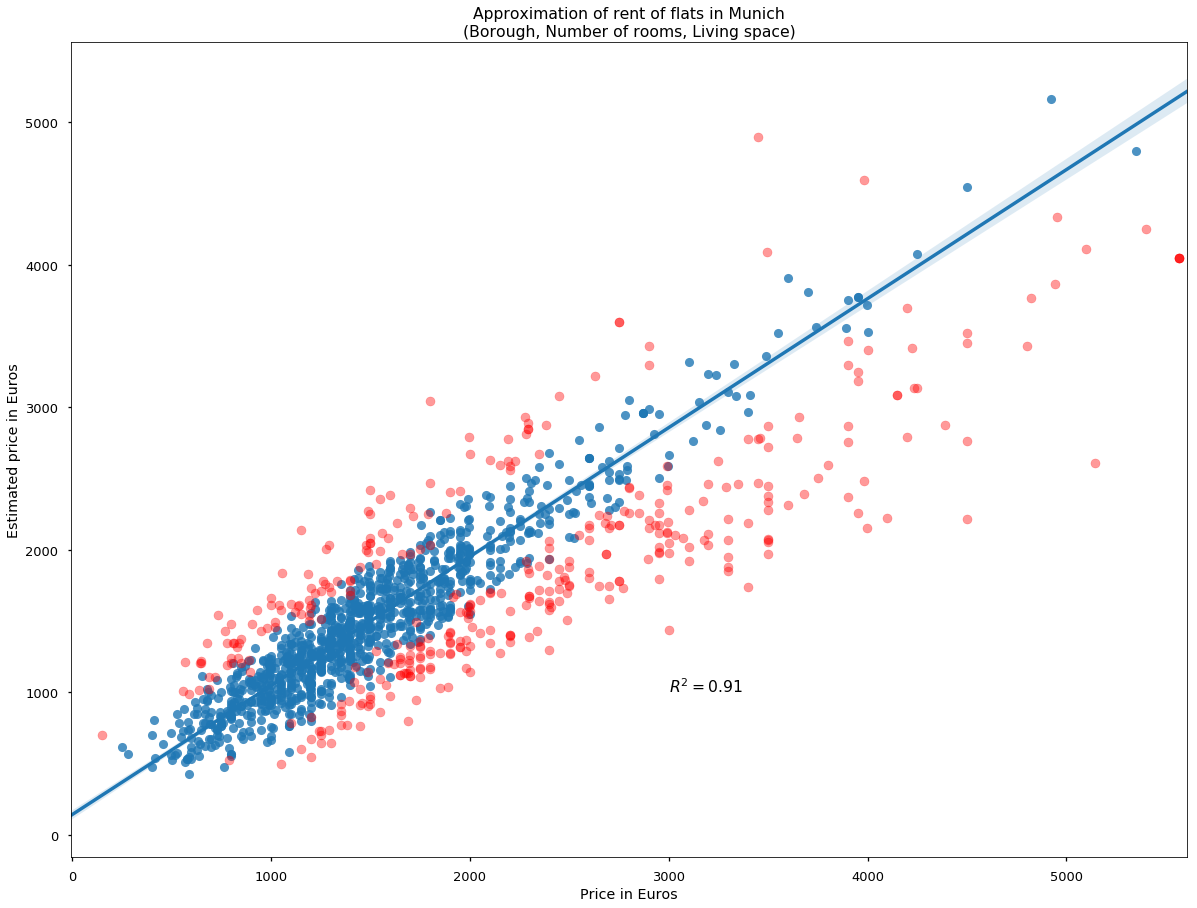

In [82]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.subplots(figsize=(20,15))

sns.regplot(neighborhoods['price'][inlier_mask],
            neighborhoods['predicted_value'][inlier_mask])
plt.scatter(neighborhoods['price'][outlier_mask],
            neighborhoods['predicted_value'][outlier_mask],
            alpha=0.4,
            c='r')
plt.title('Approximation of rent of flats in Munich\n(Borough, Number of rooms, Living space)')
plt.xlabel('Price in Euros')
plt.ylabel('Estimated price in Euros')
plt.text(3000, 1000, r'$R^2=%.2f$' % r2_ransac)
plt.savefig('LinReg-Rent-Apartment.png', dpi=150)

Let's add another column to our neighborhoods dataframe called price_delta which reflects the distance from the actual price to the predicted price.  
If the price delta is negative, then it is a good price and we will recommend to rent this apartment.  
If it is negative, the recommendation will be not rent.

In [83]:
neighborhoods['price_delta'] = neighborhoods['price'] - neighborhoods['predicted_value']

In [84]:
neighborhoods

Borough  \
393                                      Schwabing-West   
222                                      Schwabing-West   
45                                       Altstadt-Lehel   
652                               Neuhausen-Nymphenburg   
301                                      Schwabing-West   
459                                       Au-Haidhausen   
759                               Milbertshofen-Am Hart   
764                               Milbertshofen-Am Hart   
654                               Neuhausen-Nymphenburg   
1350                                Allach-Untermenzing   
1001                                 Ramersdorf-Perlach   
1195  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1068                            Obergiesing-Fasangarten   
1276                                 Pasing-Obermenzing   
1029                                 Ramersdorf-Perlach   
946                                      Trudering-Riem   
194                                         Maxvorstadt   
612                                    Schwanthalerhöhe   
79                         Ludwigsvorstadt-Isarvorstadt   
603                                    Schwanthalerhöhe   
718                                             Moosach   
732                                             Moosach   
711                                             Moosach   
479                                       Au-Haidhausen   
1054                            Obergiesing-Fasangarten   
117                        Ludwigsvorstadt-Isarvorstadt   
1243                                             Hadern   
574                                   Sendling-Westpark   
875                                        Berg am Laim   
959                                      Trudering-Riem   
...                                                 ...   
94                         Ludwigsvorstadt-Isarvorstadt   
1085                            Untergiesing-Harlaching   
368                                      Schwabing-West   
172                                         Maxvorstadt   
1103                            Untergiesing-Harlaching   
48                         Ludwigsvorstadt-Isarvorstadt   
11                                       Altstadt-Lehel   
314                                      Schwabing-West   
59                         Ludwigsvorstadt-Isarvorstadt   
231                                      Schwabing-West   
224                                      Schwabing-West   
643                               Neuhausen-Nymphenburg   
613                                    Schwanthalerhöhe   
642                               Neuhausen-Nymphenburg   
178                                         Maxvorstadt   
156                                         Maxvorstadt   
132                                         Maxvorstadt   
660                               Neuhausen-Nymphenburg   
184                                         Maxvorstadt   
182                                         Maxvorstadt   
164                                         Maxvorstadt   
183                                         Maxvorstadt   
148                                         Maxvorstadt   
786                                         Bogenhausen   
7                                        Altstadt-Lehel   
244                                      Schwabing-West   
30                                       Altstadt-Lehel   
798                                         Bogenhausen   
126                                         Maxvorstadt   
210                                         Maxvorstadt   

                                           Neighborhood  Latitude_x  \
393   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
222   Neuschwabing , Am Luitpoldpark , Schwere-Reite...   48.167852   
45    Graggenau , Angerviertel , Hackenviertel , Kre...   48.143054   
652   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
301   Neuschwabing , Am Luitpoldpa

In [85]:
best_apt = neighborhoods.sort_values('price_delta')
best_apt

Borough  \
632                               Neuhausen-Nymphenburg   
1357                                Allach-Untermenzing   
489                                            Sendling   
623                               Neuhausen-Nymphenburg   
1142  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1146  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
474                                       Au-Haidhausen   
154                                         Maxvorstadt   
1141  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1397                                               Laim   
500                                            Sendling   
881                                        Berg am Laim   
76                         Ludwigsvorstadt-Isarvorstadt   
704                                             Moosach   
728                                             Moosach   
738                                             Moosach   
51                         Ludwigsvorstadt-Isarvorstadt   
548                                   Sendling-Westpark   
197                                         Maxvorstadt   
1304                         Aubing-Lochhausen-Langwied   
510                                            Sendling   
163                                         Maxvorstadt   
473                                       Au-Haidhausen   
87                         Ludwigsvorstadt-Isarvorstadt   
603                                    Schwanthalerhöhe   
56                         Ludwigsvorstadt-Isarvorstadt   
527                                   Sendling-Westpark   
112                        Ludwigsvorstadt-Isarvorstadt   
816                                         Bogenhausen   
1064                            Obergiesing-Fasangarten   
...                                                 ...   
224                                      Schwabing-West   
659                               Neuhausen-Nymphenburg   
379                                      Schwabing-West   
845                                         Bogenhausen   
271                                      Schwabing-West   
191                                         Maxvorstadt   
708                                             Moosach   
754                               Milbertshofen-Am Hart   
1103                            Untergiesing-Harlaching   
148                                         Maxvorstadt   
183                                         Maxvorstadt   
164                                         Maxvorstadt   
182                                         Maxvorstadt   
266                                      Schwabing-West   
16                                       Altstadt-Lehel   
1154  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
807                                         Bogenhausen   
1190  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
786                                         Bogenhausen   
11                                       Altstadt-Lehel   
244                                      Schwabing-West   
133                                         Maxvorstadt   
40                                       Altstadt-Lehel   
314                                      Schwabing-West   
30                                       Altstadt-Lehel   
132                                         Maxvorstadt   
7                                        Altstadt-Lehel   
798                                         Bogenhausen   
210                                         Maxvorstadt   
126                                         Maxvorstadt   

                                           Neighborhood  Latitude_x  \
632   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
1357             Industriebezirk , Untermenzing-Allach    48.190516   
489                    Untersendling , Sendlinger Feld    48.112627   
623   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
1142  Thalkirchen , Obersendling ,

### Discussion
Remember, how we wanted to find the best apartment in the boroughs Hadern, Laim, Milbertshofen-Am Hart and Sendling-Westpark?  
It seems like the apartment with index **1397** and a price_delta of -787 seems to be it!  
Let's see what the landlord has to say.  

### Data visualization
But before, let's put all these data points on a map:

In [86]:
best_apt['buy'] = best_apt['price_delta'] < 0
neighborhoods['buy'] = neighborhoods['price_delta'] < 0
best_apt

Borough  \
632                               Neuhausen-Nymphenburg   
1357                                Allach-Untermenzing   
489                                            Sendling   
623                               Neuhausen-Nymphenburg   
1142  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1146  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
474                                       Au-Haidhausen   
154                                         Maxvorstadt   
1141  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
1397                                               Laim   
500                                            Sendling   
881                                        Berg am Laim   
76                         Ludwigsvorstadt-Isarvorstadt   
704                                             Moosach   
728                                             Moosach   
738                                             Moosach   
51                         Ludwigsvorstadt-Isarvorstadt   
548                                   Sendling-Westpark   
197                                         Maxvorstadt   
1304                         Aubing-Lochhausen-Langwied   
510                                            Sendling   
163                                         Maxvorstadt   
473                                       Au-Haidhausen   
87                         Ludwigsvorstadt-Isarvorstadt   
603                                    Schwanthalerhöhe   
56                         Ludwigsvorstadt-Isarvorstadt   
527                                   Sendling-Westpark   
112                        Ludwigsvorstadt-Isarvorstadt   
816                                         Bogenhausen   
1064                            Obergiesing-Fasangarten   
...                                                 ...   
224                                      Schwabing-West   
659                               Neuhausen-Nymphenburg   
379                                      Schwabing-West   
845                                         Bogenhausen   
271                                      Schwabing-West   
191                                         Maxvorstadt   
708                                             Moosach   
754                               Milbertshofen-Am Hart   
1103                            Untergiesing-Harlaching   
148                                         Maxvorstadt   
183                                         Maxvorstadt   
164                                         Maxvorstadt   
182                                         Maxvorstadt   
266                                      Schwabing-West   
16                                       Altstadt-Lehel   
1154  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
807                                         Bogenhausen   
1190  Thalkirchen-Obersendling-Forstenried-Fürstenri...   
786                                         Bogenhausen   
11                                       Altstadt-Lehel   
244                                      Schwabing-West   
133                                         Maxvorstadt   
40                                       Altstadt-Lehel   
314                                      Schwabing-West   
30                                       Altstadt-Lehel   
132                                         Maxvorstadt   
7                                        Altstadt-Lehel   
798                                         Bogenhausen   
210                                         Maxvorstadt   
126                                         Maxvorstadt   

                                           Neighborhood  Latitude_x  \
632   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
1357             Industriebezirk , Untermenzing-Allach    48.190516   
489                    Untersendling , Sendlinger Feld    48.112627   
623   Neuhausen , Nymphenburg , Oberwiesenfeld , St....   48.155115   
1142  Thalkirchen , Obersendling ,

In [87]:
#!conda install -c conda-forge folium=0.5.0 --yes
import branca
import folium # map rendering library

# create map of New York using latitude and longitude values
map_munich2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for url, lat, lng, borough, price, livingSpace, numberOfRooms, predicted_value, buy in zip(neighborhoods['url'], neighborhoods['Latitude_y'], neighborhoods['Longitude_y'], neighborhoods['Borough'], neighborhoods['price'], neighborhoods['livingSpace'], neighborhoods['numberOfRooms'], neighborhoods['predicted_value'], neighborhoods['buy']):
    label = "<a href='{}'target='_blank'>Apartment in {}</a> <br> Actual price: {} € <br> Square meters: {} <br> Rooms: {} <br> Predicted price: {} € <br> Buy: {}".format(url, borough, int(price), int(livingSpace), int(numberOfRooms), int(predicted_value), buy)
    iframe = branca.element.IFrame(html=label, width=200, height=200)
    label = folium.Popup(iframe,parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_munich2)  
    
map_munich2

## Conclusion
In summary, I was looking up all boroughs in Munich.  
With these boroughs, I checked the most common venue category for each with the Foursquare API.  
As a personal preference, I wanted to have supermarket and public transport access as my most common venue category.  
Several suitable boroughs have been selected.

Afterwards, I scraped all available apartments in Munich from the biggest rental platform.  
I did some descriptive statistics on those to find the average monthly rent price of 1758 euros with 2.66 rooms.  
After building a regression model with the RANSAC method, I predicted the prices for apartments regarding the characteristics living space, number of rooms and boroughs.  (multi-linear regression)  
All this data has been displayed on a folium map.  
As a choice of presentation, I put this onto my website too: www.etherx.de  
Finally, I calculated the difference of the actual monthly rental price and the predicted price and looked for the apartment with the biggest delta in my pre-selected boroughs.  
An apartment in Laim with the ID 1397 has been selected as the "best" apartment.